# Credit Risk Analysis - 3

## Classification with Logistic Regression

### Training/Test Split

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, ConfusionMatrixDisplay

In [37]:
df_loan_default = pd.read_csv("credit_risk_dataset_feat.csv")
df_loan_default

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0.013514,0.005932,0.121951,0.014493,0.321348,0,0.10,0.000000,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0.067568,0.005932,0.024390,0.144928,0.418539,1,0.57,0.035714,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0.040541,0.065148,0.097561,1.000000,0.551124,1,0.53,0.000000,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0.054054,0.053390,0.195122,1.000000,0.497191,1,0.55,0.071429,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.013514,0.006250,0.048780,0.057971,0.096629,1,0.25,0.000000,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32561,0.500000,0.051907,0.024390,0.153623,0.434831,0,0.11,1.000000,1,0,...,0,0,0,1,0,0,0,0,1,0
32562,0.459459,0.122881,0.097561,0.496377,0.116292,0,0.15,0.607143,1,0,...,0,1,0,0,0,0,0,0,1,0
32563,0.608108,0.076271,0.073171,1.000000,0.312921,1,0.46,0.928571,0,0,...,0,0,1,0,0,0,0,0,1,0
32564,0.486486,0.154661,0.121951,0.420290,0.340449,0,0.10,0.857143,1,0,...,0,0,1,0,0,0,0,0,1,0


In [38]:
x = df_loan_default.drop(['loan_status'], axis=1)
y = df_loan_default['loan_status']

In [39]:
print("x has {0} rows and {1} columns".format(x.shape[0], x.shape[1]))
print("y has {0} rows".format(y.count()))

x has 32566 rows and 26 columns
y has 32566 rows


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=99)

In [41]:
print("x_train has {0} rows and {1} columns".format(x_train.shape[0], x_train.shape[1]))
print("x_test has {0} rows and {1} columns".format(x_test.shape[0], x_test.shape[1]))
print("y_train has {0} rows".format(y_train.count()))
print("y_test has {0} rows".format(y_test.count()))

x_train has 26052 rows and 26 columns
x_test has 6514 rows and 26 columns
y_train has 26052 rows
y_test has 6514 rows


In [42]:
y_train.value_counts(normalize=True)

loan_status
0    0.780132
1    0.219868
Name: proportion, dtype: float64

In [43]:
y_test.value_counts(normalize=True)

loan_status
0    0.788302
1    0.211698
Name: proportion, dtype: float64

In [44]:
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [45]:
preds = logistic_model.predict(x_test)
preds

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [46]:
logistic_model.score(x_test, y_test)

0.867669634633098

## Model Evaluation

### Confusion Matrix

In [47]:
conf_mat = confusion_matrix(y_test, preds)
conf_mat

array([[4911,  224],
       [ 638,  741]], dtype=int64)

In [48]:
tn = conf_mat[0][0]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tp = conf_mat[1][1]

In [49]:
print("True Negatives (Correct Non-Defaults): ", tn)
print("False Positives (Incorrect Defaults): ", fp)
print("False Negatives (Incorrect Non-Defaults): ", fn)
print("True Positives (Correct Defaults)", tp)

True Negatives (Correct Non-Defaults):  4911
False Positives (Incorrect Defaults):  224
False Negatives (Incorrect Non-Defaults):  638
True Positives (Correct Defaults) 741


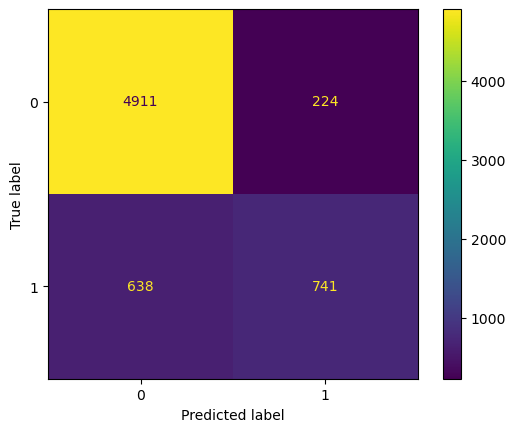

In [50]:
ConfusionMatrixDisplay.from_estimator(logistic_model, x_test, y_test)
plt.show()

In [51]:
precision = precision_score(y_test, preds)
precision

0.7678756476683938

In [52]:
recall = recall_score(y_test, preds)
recall

0.5373459028281363

In [53]:
f1 = f1_score(y_test, preds)
f1

0.6322525597269625

### ROC Curve

In [54]:
probs = logistic_model.predict_proba(x_test)
probs

array([[0.87723482, 0.12276518],
       [0.2339884 , 0.7660116 ],
       [0.48860241, 0.51139759],
       ...,
       [0.55710224, 0.44289776],
       [0.66903468, 0.33096532],
       [0.87094867, 0.12905133]])

In [55]:
probs.shape

(6514, 2)

In [56]:
probs_df = pd.DataFrame()
probs_df['prob_0'] = probs[:, 0]
probs_df['prob_1'] = probs[:, 1]

probs_df.describe()

,prob_0,prob_1
count,6514.000000,6514.000000
mean,0.784425,0.215575
std,0.250251,0.250251
min,0.002019,0.001388
25%,0.705765,0.039765
50%,0.895297,0.104703
75%,0.960235,0.294235
max,0.998612,0.997981


In [57]:
fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)

In [58]:
roc_df = pd.DataFrame()
roc_df['fpr'] = fpr
roc_df['tpr'] = tpr
roc_df['threshold'] = threshold

roc_df.describe()

,fpr,tpr,threshold
count,1355.000000,1355.000000,1355.000000
mean,0.239459,0.675679,0.335795
std,0.244149,0.245439,0.260915
min,0.000000,0.000000,0.001388
25%,0.042162,0.527194,0.100145
50%,0.132230,0.736766,0.282524
75%,0.416164,0.874184,0.509294
max,1.000000,1.000000,1.997981


In [59]:
roc_auc = auc(fpr, tpr)
print("AUC: ", roc_auc)

AUC:  0.8653488514954814


In [60]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

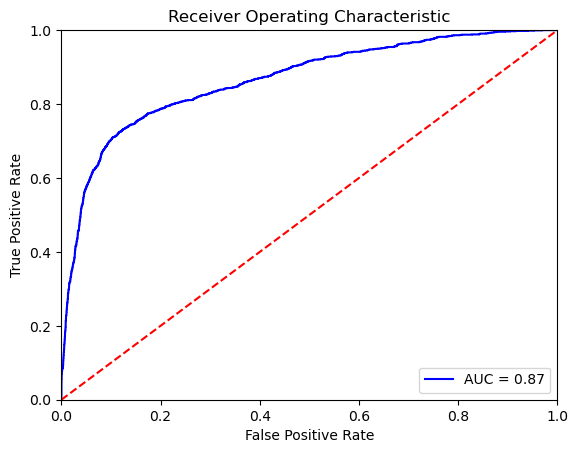

In [61]:
plot_roc_curve(fpr, tpr, roc_auc)

In [62]:
results_df = pd.DataFrame()
results_df['true_class'] = y_test
results_df['predicted_class'] = list(preds)
results_df['default_prob'] = probs[:, 1]

In [63]:
results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True)

true_class  predicted_class
0           0                  0.956378
            1                  0.043622
1           1                  0.537346
            0                  0.462654
Name: proportion, dtype: float64

In [64]:
default_probs_f = results_df[results_df['true_class'] == 0]['default_prob']
default_probs_t = results_df[results_df['true_class'] == 1]['default_prob']

C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


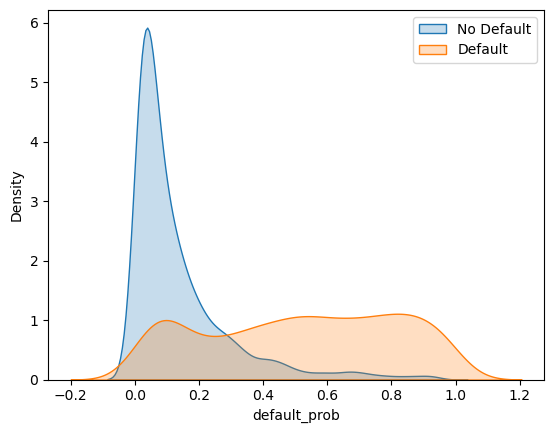

In [68]:
sns.kdeplot(default_probs_f, label="No Default", fill=True)
sns.kdeplot(default_probs_t, label="Default", fill=True)
plt.legend(loc='best')
plt.show()